In [1]:
"""
 train with augmentation
stage1 : augmentation by shuffling cluster of original face data
        augment face0 - 199
        face 200 -> end as test data (unmodified)

stage2 : train

"""
import yaml

In [2]:
# combine data and labels
# with open("data.yaml", "r") as s:
#     data = yaml.full_load(s)
# face_name_list = data["files"]
#
# with open("labels.yaml", "r") as s:
#     data = yaml.full_load(s)
# labels = data["labels"]
# result_dict = {}
# for i, face in enumerate(face_name_list):
#     result_dict.update({face: labels[i]})
#
# stream = yaml.dump(result_dict, sort_keys=False)
#
# with open("data_with_label.yaml", "w") as s:
#     s.write(stream)

In [3]:
import trimesh
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
NUM_SAMPLES = 16000
NUM_CLUSTERS = 200
NUM_AUGMENTATION = 10 # how many addition data samples per face by shuffling clusters
CLUSTER_SIZE = int(NUM_SAMPLES / NUM_CLUSTERS)

def produce_augmentation(face_path:str) -> list:
    face = trimesh.load_mesh(face_path)
    # try random sampling to reduce points?
    face_vertices = face.sample(NUM_SAMPLES)
    vertices_tensor = np.asarray(face_vertices)
    scaler = StandardScaler()
    # standardization
    scaled_vertices = scaler.fit_transform(vertices_tensor)
    new_cluster_indices = list(range(0,NUM_CLUSTERS))
    random.shuffle(new_cluster_indices)
    augmentedData = [0] * NUM_SAMPLES
    original_index = 0
    for index in new_cluster_indices:
        # insert original index data into new index position
        for j in range(CLUSTER_SIZE):
            augmentedData[CLUSTER_SIZE*index+j] = scaled_vertices[original_index]
            original_index+=1
    flattened_scaled_vertices = np.reshape(augmentedData, newshape=(3*NUM_SAMPLES))
    return flattened_scaled_vertices.tolist()

In [4]:

# process all faces
all_face_id = [ 'face1', 'face2', 'face3', 'face4', 'face5',
         'face6', 'face7', 'face8', 'face11', 'face12',
         'face13', 'face14', 'face15', 'face16',
         'face17', 'face18', 'face19', 'face20', 'face21',
         'face22', 'face23', 'face24', 'face25', 'face26',
         'face27', 'face28', 'face29', 'face30', 'face31',
         'face32', 'face33', 'face34', 'face35', 'face36',
         'face37', 'face38', 'face39', 'face40', 'face41',
         'face42', 'face43', 'face44', 'face45', 'face46',
         'face47', 'face48', 'face49', 'face50', 'face51',
         'face55', 'face56', 'face57', 'face58', 'face59',
         'face60', 'face61', 'face62', 'face63', 'face64',
         'face65', 'face66', 'face67', 'face68', 'face69',
         'face70', 'face71', 'face72', 'face74', 'face75',
         'face76', 'face77', 'face78', 'face79', 'face80',
         'face81', 'face82', 'face83', 'face84', 'face85',
         'face86', 'face87', 'face88', 'face89', 'face90',
         'face91', 'face92', 'face93', 'face94', 'face95',
         'face96', 'face97', 'face98', 'face99', 'face100',
         'face102', 'face103', 'face104', 'face105', 'face106',
         'face107', 'face108', 'face109', 'face110', 'face111',
         'face112', 'face114', 'face115', 'face116', 'face117',
         'face118', 'face119', 'face120', 'face121', 'face122',
         'face123', 'face125', 'face126', 'face127', 'face128',
         'face129', 'face130', 'face131', 'face132', 'face133',
         'face134', 'face135', 'face136', 'face137', 'face138',
         'face139', 'face140', 'face141', 'face142', 'face143',
         'face144', 'face145', 'face146', 'face147', 'face148',
         'face149', 'face150', 'face151', 'face152', 'face153',
         'face154', 'face155', 'face156', 'face157', 'face158',
         'face159', 'face160', 'face161', 'face162', 'face163',
         'face164', 'face165', 'face166', 'face167', 'face168',
         'face170', 'face171', 'face172', 'face173', 'face174',
         'face175', 'face176', 'face177', 'face178', 'face179',
         'face180', 'face182', 'face183', 'face184', 'face185',
         'face186', 'face188', 'face189', 'face190', 'face191',
         'face192', 'face193', 'face194', 'face195', 'face197',
         'face198', 'face199']


x_train = []
y_train = []

with open("data_with_label.yaml", "r") as f:
    labels = yaml.load(f, Loader=yaml.CBaseLoader)

from tqdm.auto import tqdm
for face_file in tqdm(all_face_id):
    path = f"alignedFaces/{face_file}.obj"
    # obtain flattened augmentation data
    for i in range(NUM_AUGMENTATION):
        augmented = produce_augmentation(path)
        x_train.append(augmented)
        # augmented face labeled with original label
        y_train.append(labels[face_file])

# with open("aug_data.yaml", "w") as f:
#     yaml.dump(data=data, stream=f, default_flow_style=True, sort_keys=False, Dumper=yaml.CDumper)
# with open("aug_data_label.yaml", "w") as f:
#     yaml.dump(data=augmented_labels, stream=f,
#               default_flow_style=True, sort_keys=False, Dumper=yaml.CDumper)


# face 200 and later will be used as test data
# no augmentation is performed at all, just flattening
test_face_for_aug = ['face200', 'face201', 'face202',
         'face203', 'face204', 'face205', 'face206', 'face207',
         'face208', 'face209', 'face210', 'face211', 'face212',
         'face213', 'face214', 'face215', 'face216', 'face217',
         'face218', 'face219', 'face220', 'face221', 'face222',
         'face223', 'face224', 'face225', 'face226', 'face228',
         'face229', 'face230', 'face233', 'face234', 'face235',
         'face236', 'face237', 'face238', 'face239', 'face240',
         'face242', 'face243', 'face244', 'face245', 'face246',
         'face247', 'face248', 'face249', 'face250', 'face251',
         'face252', 'face253', 'face254', 'face255', 'face256',
         'face257', 'face258', 'face259', 'face260', 'face261',
         'face262', 'face263', 'face264', 'face265', 'face266',
         'face267', 'face268', 'face269', 'face270', 'face271',
         'face272', 'face273', 'face274', 'face276', 'face277',
         'face278', 'face279', 'face280', 'face281', 'face282',
         'face283', 'face284', 'face285', 'face286', 'face287'
]


def preprocess(face_path:str, num_samples=NUM_SAMPLES) -> list:
    """
    return standardized fixed sampling vertices of given face in tensor form
    keep num_samples small to speed up training
    num_samples is ideally less than minimum number of vertices of all given face
    so that size of tensor will be consistent
    """
    face = trimesh.load_mesh(face_path)
    # try random sampling to reduce points?
    face_vertices = face.sample(num_samples)
    vertices_tensor = np.asarray(face_vertices)
    scaler = StandardScaler()
    # standardization
    scaled_vertices = scaler.fit_transform(vertices_tensor)
    # flatten it?
    flattened_scaled_vertices = np.reshape(scaled_vertices, newshape=(3*num_samples))
    return flattened_scaled_vertices.tolist()

x_test = []
for face_file in tqdm(test_face_for_aug):
    path = f"alignedFaces/{face_file}.obj"
    x_test.append(preprocess(path))

# with open("test_data_for_aug.yaml", "w") as f:
#     yaml.dump(data, stream=f, sort_keys=False, default_flow_style=True, Dumper=yaml.CDumper)



  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

In [5]:
# ----------------------training--------------------------
# --------------------------------------------------------
# --------------------------------------------------------
# --------------------------------------------------------
# --------------------------------------------------------
# --------------------------------------------------------
import yaml
import numpy as np
import pandas
import torch
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from torch import nn
import math
import matplotlib.pyplot as plt

EPOCHS = 20
BATCH_SIZE = 50
LR = 0.1
WEIGHT_DECAY = 0.08
# RANDOM_SEED = 42



# load in y_test (original 200->)
with open("test_label_for_aug.yaml", "r") as f:
    data_dict = yaml.load(f, Loader=yaml.CBaseLoader)
    y_test = np.asarray(list(data_dict.values()))

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)

num_of_features = x_train.shape[1]
train_data = torch.from_numpy(x_train.astype(np.float32))
test_data = torch.from_numpy(x_test.astype(np.float32))
train_label = torch.from_numpy(y_train.astype(np.float32)).type(torch.LongTensor)
test_label = torch.from_numpy(y_test.astype(np.float32)).type(torch.LongTensor)


# setup neural network and optimizer&loss
features = 30
module = nn.Sequential(
    nn.Linear(in_features=num_of_features, out_features=features),
    nn.ReLU(),
    # nn.Dropout(p=0.2),
    nn.Linear(in_features=features, out_features=features),
    nn.LeakyReLU(),
    nn.Linear(in_features=features, out_features=10)
)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=module.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)


def acc_func(pred: torch.Tensor, true_label: torch.Tensor) -> float:
    pred_labels = torch.softmax(pred, dim=1).argmax(dim=1)
    return sum(pred_labels == true_label) / len(true_label)


# training
epochs = EPOCHS
batch_size = BATCH_SIZE

train_loss = []
test_loss = []
train_acc = []
test_acc = []

# ---------------original---------------
with torch.inference_mode():
        # train loss
        trainloss = loss_func(module(train_data), train_label)
        train_loss.append(trainloss)
        # train acc
        trainacc = acc_func(module(train_data), train_label)
        train_acc.append(trainacc)
        # test loss
        testloss = loss_func(module(test_data), test_label)
        test_loss.append(testloss)
        # test acc
        testacc = acc_func(module(test_data), test_label)
        test_acc.append(testacc)
        print(f"init train loss:{trainloss:.2f} | "
              f"init train acc:{trainacc * 100:.2f}% | "
              f"init test loss:{testloss:.2f} | "
              f"init test acc:{testacc * 100:.2f}%")

# ---------------------------------------




for epoch in tqdm(range(epochs)):
    print(f"----------------------epoch{epoch} --------------------")
    data_index = 0
    for batch_number in range(math.ceil(train_data.size()[0] / batch_size)):
        # if batch_number % 10 == 0:
        #     print(f"batch#{batch_number}/{math.ceil(train_data.size()[0] / batch_size)}")
        this_batch_data = train_data[data_index:data_index + batch_size, :]
        this_batch_label = train_label[data_index:data_index + batch_size]
        data_index = data_index + batch_size
        # forward pass
        y_pred = module(this_batch_data)
        # get loss
        loss = loss_func(y_pred, this_batch_label)
        # zero grad
        optimizer.zero_grad()
        # loss back
        loss.backward()
        # step
        optimizer.step()

    # end of epoch, making prediction and store summary
    with torch.inference_mode():
        # train loss
        trainloss = loss_func(module(train_data), train_label)
        train_loss.append(trainloss)
        # train acc
        trainacc = acc_func(module(train_data), train_label)
        train_acc.append(trainacc)
        # test loss
        testloss = loss_func(module(test_data), test_label)
        test_loss.append(testloss)
        # test acc
        testacc = acc_func(module(test_data), test_label)
        test_acc.append(testacc)
        print(f"train loss:{trainloss:.2f} | "
              f"train acc:{trainacc * 100:.2f}% | "
              f"test loss:{testloss:.2f} | "
              f"test acc:{testacc * 100:.2f}%")


init train loss:2.34 | init train acc:8.28% | init test loss:2.34 | init test acc:12.05%


  0%|          | 0/20 [00:00<?, ?it/s]

----------------------epoch0 --------------------
train loss:1.40 | train acc:56.99% | test loss:1.83 | test acc:37.35%
----------------------epoch1 --------------------
train loss:2.29 | train acc:42.04% | test loss:2.08 | test acc:37.35%
----------------------epoch2 --------------------
train loss:0.51 | train acc:79.84% | test loss:2.07 | test acc:34.94%
----------------------epoch3 --------------------
train loss:0.36 | train acc:87.90% | test loss:2.09 | test acc:33.73%
----------------------epoch4 --------------------
train loss:0.27 | train acc:91.24% | test loss:2.11 | test acc:34.94%
----------------------epoch5 --------------------
train loss:0.24 | train acc:92.20% | test loss:2.12 | test acc:38.55%
----------------------epoch6 --------------------
train loss:0.22 | train acc:93.60% | test loss:2.12 | test acc:33.73%
----------------------epoch7 --------------------
train loss:0.20 | train acc:94.68% | test loss:2.13 | test acc:31.33%
----------------------epoch8 -----------

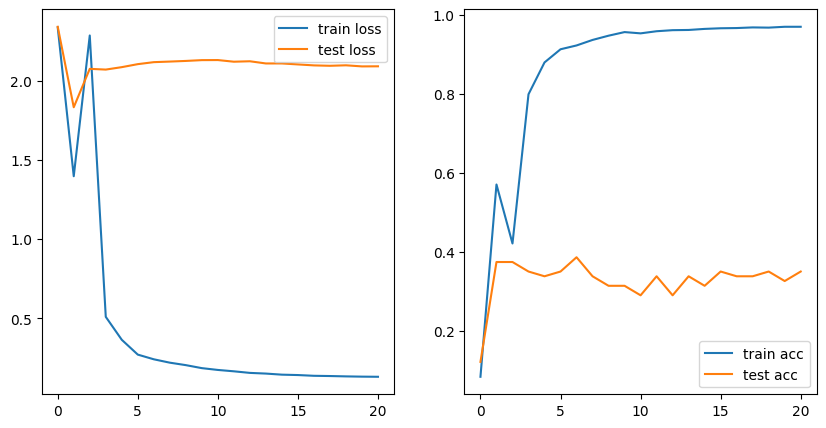

In [6]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(["train loss", "test loss"])
plt.subplot(1, 2, 2)
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(["train acc", "test acc"])
plt.show()